# **Business Case - Aerofit**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit.csv

--2023-04-05 14:52:23--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 65.8.55.204, 65.8.55.115, 65.8.55.208, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|65.8.55.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-04-05 14:52:24 (1.93 GB/s) - ‘aerofit.csv’ saved [7279/7279]



## 1. Defining Problem Statement and Analysing basic metrics

**About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Problem Statement**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.



1.   Perform descriptive analytics **to create a customer profile** for each AeroFit treadmill product by developing appropriate tables and charts.
2.   For each AeroFit treadmill product, construct **two-way contingency tables** and compute all **conditional and marginal probabilities** along with their insights/impact on the business


---
















**Analysing basic metrics**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months.

**Product Purchased**:	KP281, KP481, or KP781

**Age**:	In years

**Gender**:	Male/Female

**Education**:	In years

**MaritalStatus**:	Single or partnered

**Usage**:	The average number of times the customer plans to use the treadmill each week.

**Income**:	Annual income (in $)

**Fitness**:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

**Miles**:	The average number of miles the customer expects to walk/run each week



---

**Product Portfolio:**


*   The KP281 is an entry-level treadmill that sells for $1,500.

*   The KP481 is for mid-level runners that sell for $1,750.

*   The KP781 treadmill is having advanced features that sell for $2,500.



---



### 1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [ ]:
# Import data
aerofit = pd.read_csv('aerofit.csv')
aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
#shape of the data
aerofit.shape

(180, 9)

In [ ]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
#statistical summary
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
aerofit.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
#conversion of categorical attributes to 'category'
income_points = [29000, 50000, 70000, 90000, 110000]
income_labels = ['Below Average','Average','High','Very High']
aerofit['Income_Range'] =  pd.cut(aerofit['Income'], bins=income_points, labels=income_labels)

miles_points = [20, 90, 180, 270, 380]
miles_labels = ['Low','Medium','High','Very High']
aerofit['Miles_Range'] =  pd.cut(aerofit['Miles'], bins=miles_points, labels=miles_labels)

aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Range,Miles_Range
0,KP281,18,Male,14,Single,3,4,29562,112,Below Average,Medium
1,KP281,19,Male,15,Single,2,3,31836,75,Below Average,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Below Average,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Below Average,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Below Average,Low


## 2. Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
#number of unique values in our data
for i in aerofit.columns:
  print(i,':',aerofit[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37
Income_Range : 4
Miles_Range : 4


In [ ]:
#unique attributes 
products = aerofit['Product'].unique() 
products 

In [ ]:
#checking null values in every column of our data
aerofit.isnull().sum() #There are no NaN values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
Income_Range     0
Miles_Range      0
dtype: int64

In [ ]:
#checking the occurences of each of the Product
aerofit['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
# Count with respect to Gender
aerofit['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
# Count with respect to MaritalStatus
aerofit['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
# Count with respect to Fitness
aerofit['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [ ]:
# Count with respect to Education
aerofit['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [ ]:
# Count with respect to Usage
aerofit['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

## 3. Visual Analysis - Univariate & Bivariate

### 1. For continuous variable(s): Distplot, countplot, histogram for univariate analysis

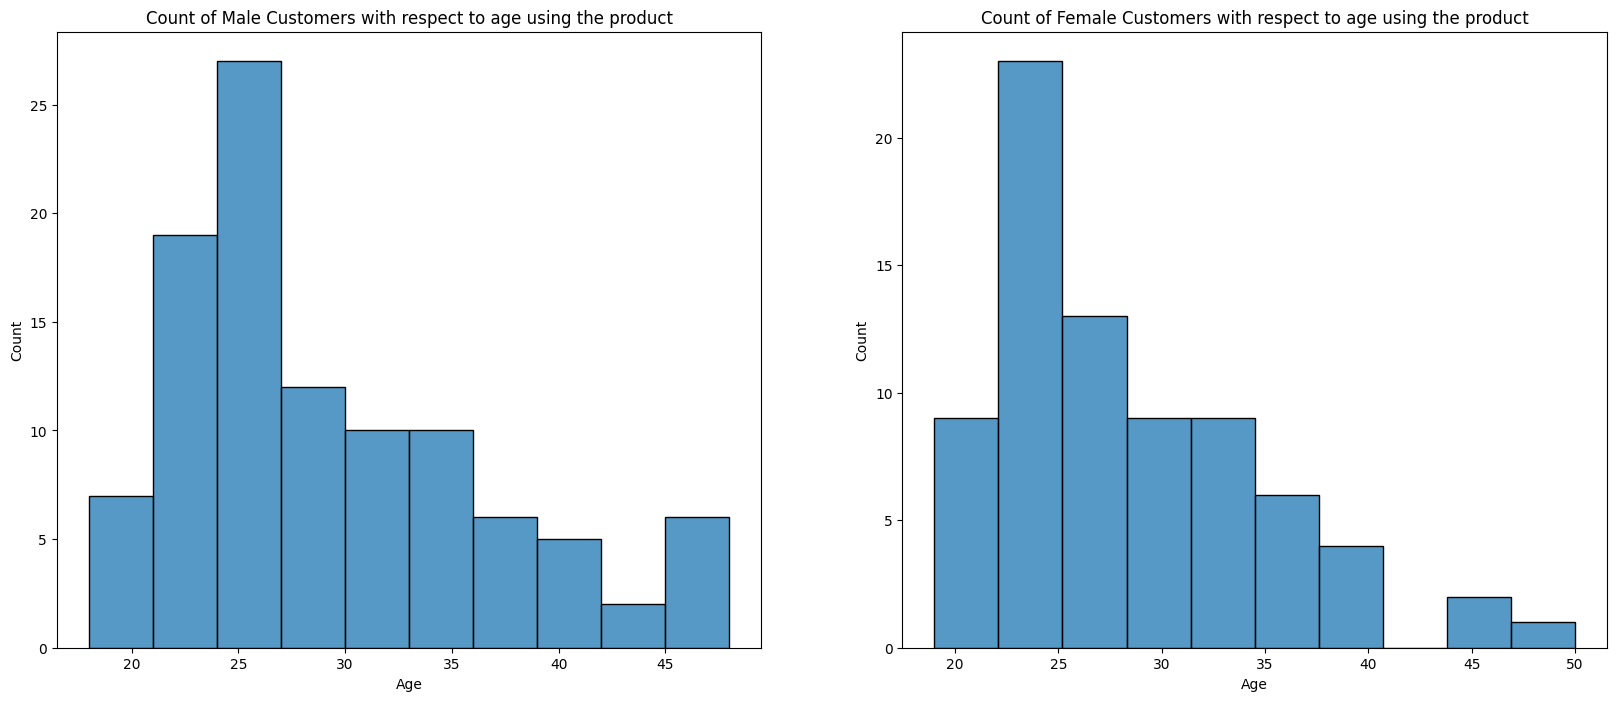

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(data=aerofit.loc[aerofit['Gender']=='Male'],x='Age',bins=10)
plt.title('Count of Male Customers with respect to age using the product')
plt.subplot(1,2,2)
sns.histplot(data=aerofit.loc[aerofit['Gender']=='Female'],x='Age',bins=10)
plt.title('Count of Female Customers with respect to age using the product')
plt.show()

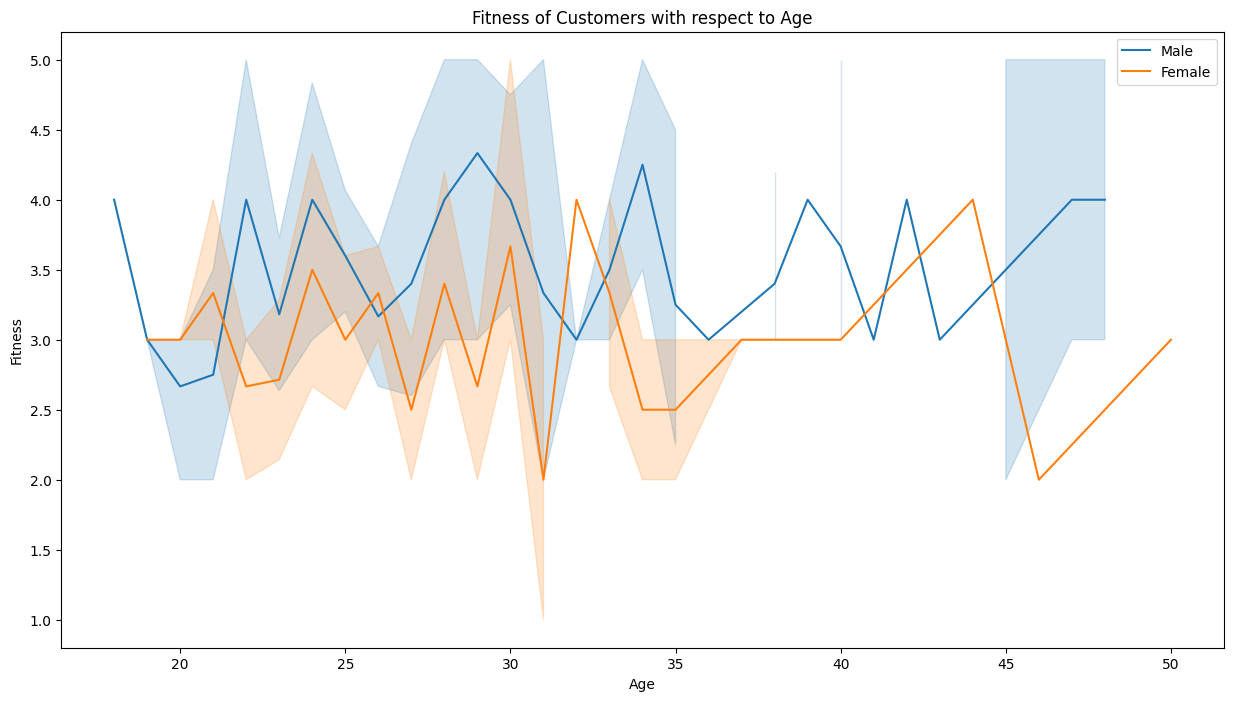

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=aerofit.loc[aerofit['Gender']=='Male'],x='Age',y='Fitness',label='Male')
sns.lineplot(data=aerofit.loc[aerofit['Gender']=='Female'],x='Age',y='Fitness',label='Female')
plt.title('Fitness of Customers with respect to Age')
plt.show()

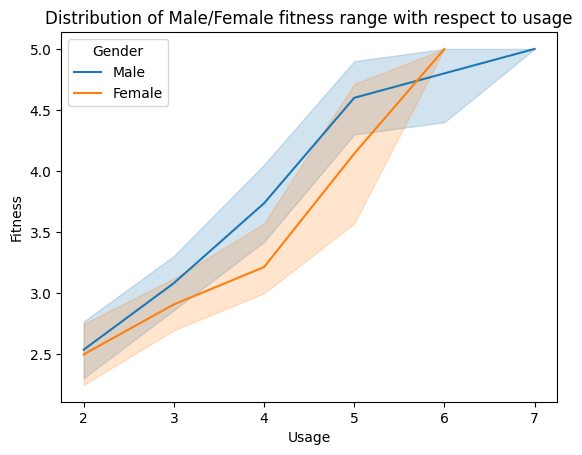

In [ ]:
sns.lineplot(data=aerofit,x='Usage',y='Fitness',hue="Gender")
plt.title('Distribution of Male/Female fitness range with respect to usage')
plt.show()

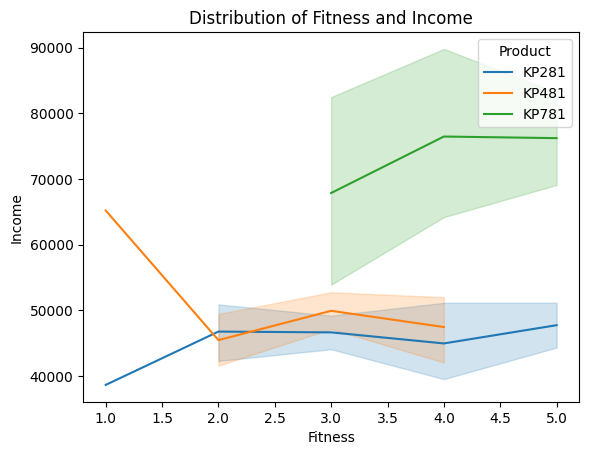

In [ ]:
sns.lineplot(data=aerofit,x='Fitness',y='Income',hue="Product")
plt.title('Distribution of Fitness and Income')
plt.show()

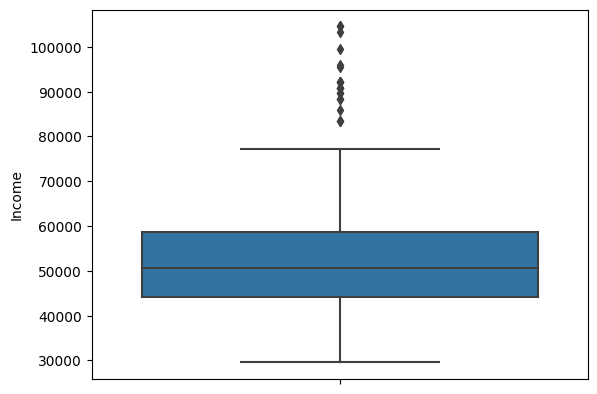

In [ ]:
sns.boxplot(data=aerofit,y='Income')
plt.show()

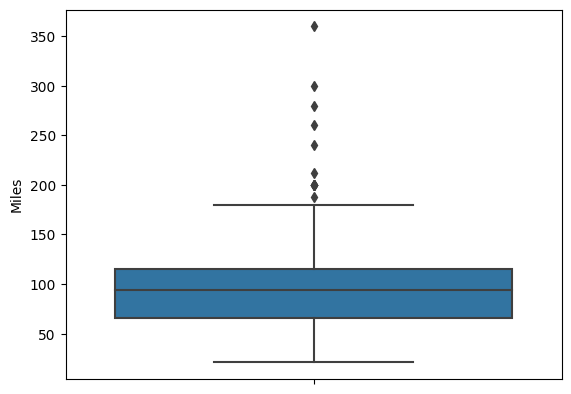

In [ ]:
sns.boxplot(data=aerofit,y='Miles')
plt.show()

### 2. For categorical variable(s): Boxplot

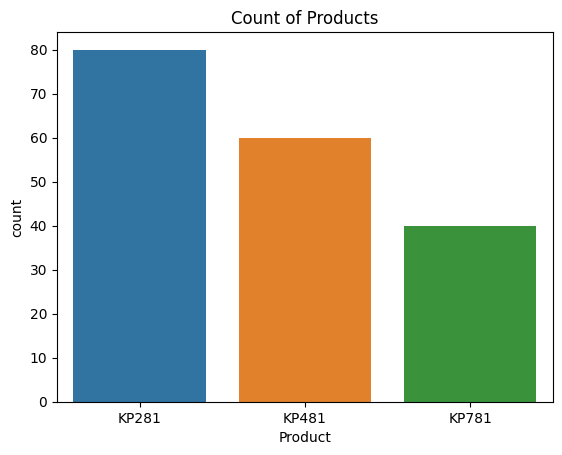

In [ ]:
sns.countplot(data=aerofit,x='Product')
plt.title('Count of Products')
plt.show()

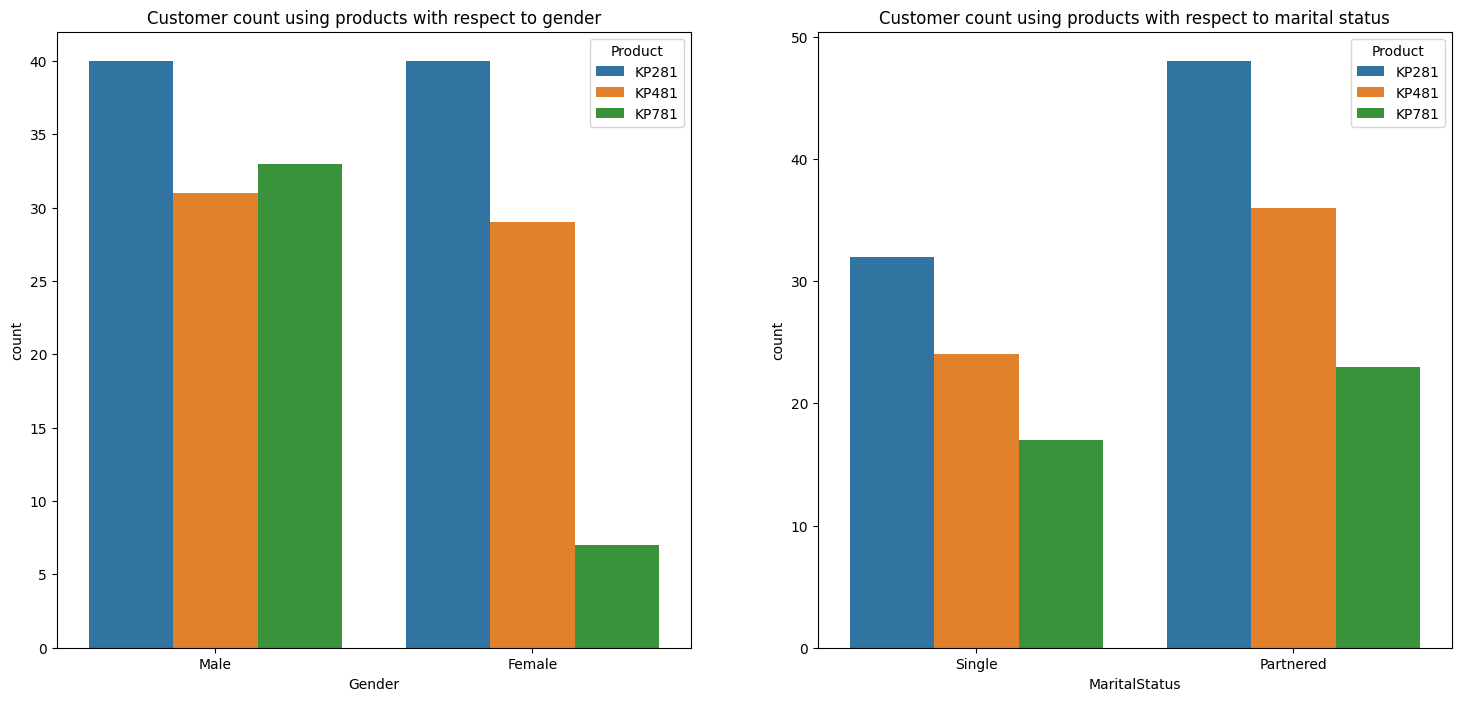

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.countplot(data=aerofit,x='Gender',hue='Product')
plt.title('Customer count using products with respect to gender')
plt.subplot(1,2,2)
sns.countplot(data=aerofit,x='MaritalStatus',hue='Product')
plt.title('Customer count using products with respect to marital status')
plt.show()

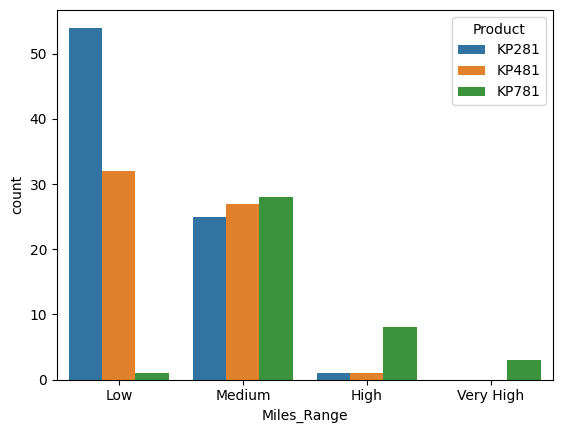

In [ ]:
sns.countplot(data=aerofit,x='Miles_Range',hue='Product')
plt.show()

### 3. For correlation: Heatmaps, Pairplots

In [ ]:
correlation1 = pd.crosstab(aerofit['Product'],aerofit.Gender,margins=True)
correlation1

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
correlation2 = pd.crosstab(aerofit['Product'],aerofit.MaritalStatus,margins=True)
correlation2

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


Using the above calculation, we can find **marginal probability** and **conditional probability** :

**Marginal Probability**:

P(KP281) = 80/180 = 0.444

P(KP481) = 60/180 = 0.333

P(KP781) = 40/180 = 0.222

P(Male) = 104/180 = 0.577

P(Female) = 76/180 = 0.422

P(Partnered) = 107/180 = 0.594

P(Single) = 73/180 = 0.405


---



**Conditional Probability** :

P(KP281 | Male ) = 40/104 = 0.384

P(KP281 | Female ) = 40/76 = 0.526

P(KP481 | Male ) = 31/104 = 0.298

P(KP481 | Female ) = 29/76 = 0.381

P(KP781 | Male ) = 33/104 = 0.314

P(KP781 | Female ) = 7/76 = 0.092

P(KP281 | Partnered ) = 48/107 = 0.448

P(KP281 | Single ) = 32/73 = 0.438

P(KP481 | Partnered ) = 36/107  = 0.336

P(KP481 | Single ) = 24/73= 0.328

P(KP781 | Partnered ) = 23/107  = 0.214

P(KP781 | Single ) = 17/73 = 0.232

---



In [ ]:
corr = pd.crosstab(aerofit['Product'],[aerofit.Gender,aerofit.MaritalStatus])
sns.heatmap(corr,annot=True)
plt.show()

NameError: ignored

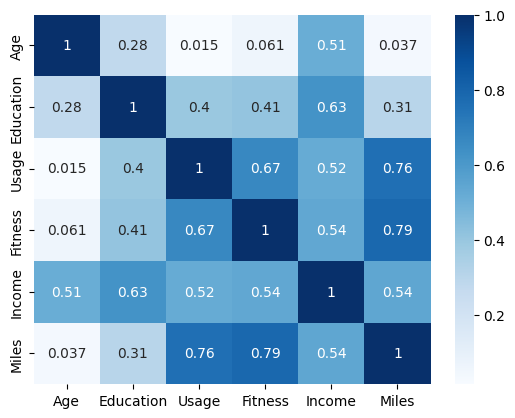

In [ ]:
sns.heatmap(aerofit.corr(),annot=True,cmap='Blues')
plt.show()

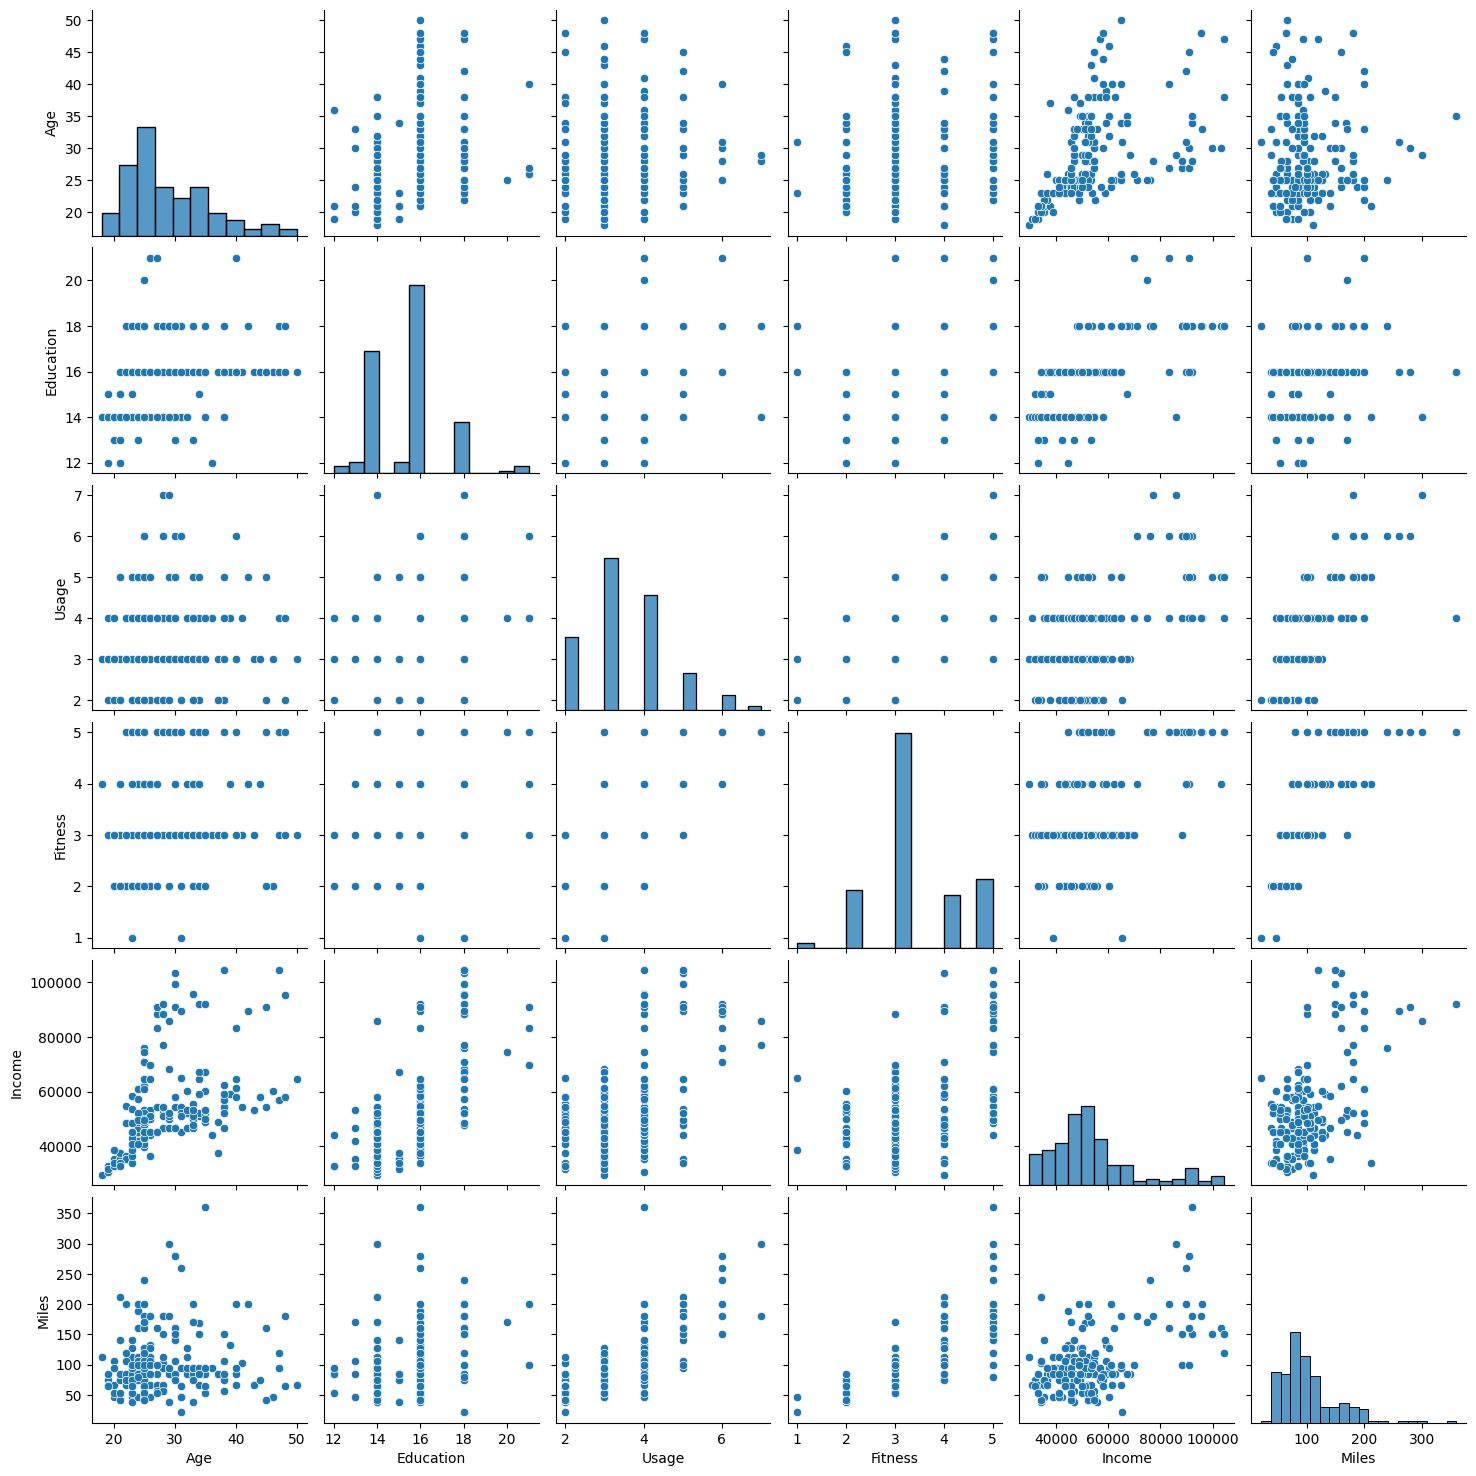

In [ ]:
sns.pairplot(data=aerofit)
plt.show()

## 4. Missing Value & Outlier Detection 

In [ ]:
#Missing Value Detection
aerofit.isna().sum() #There are no missing values in this dataset

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
Income_Range     0
Miles_Range      0
dtype: int64

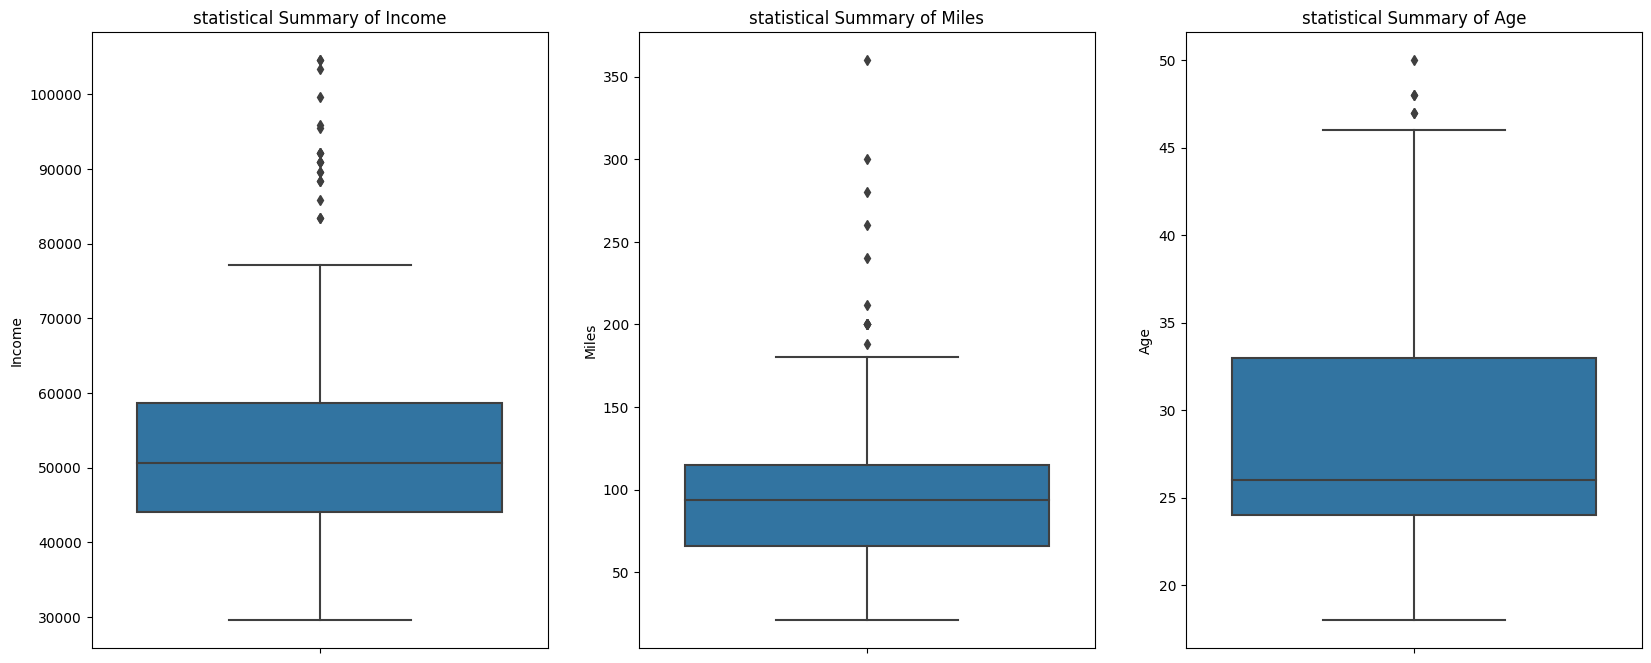

In [ ]:
#Outlier Detection
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(data=aerofit,y='Income')
plt.title('statistical Summary of Income')
plt.subplot(1,3,2)
sns.boxplot(data=aerofit,y='Miles')
plt.title('statistical Summary of Miles')
plt.subplot(1,3,3)
sns.boxplot(data=aerofit,y='Age')
plt.title('statistical Summary of Age')
plt.show()

From the above charts,

We can determine the outliers for the respective fields,

**Income**:
  
    Below 30000 and above 78000 is considered outliers

**Miles**:
 
    Below 46 and above 180 miles is considered outliers

**Age**:

    Below 17 and above 46  is considered outliers

In [ ]:
#Further analysis for getting potential outliers using z-score test
z_scores = (aerofit["Income"] - aerofit["Income"].mean()) / aerofit["Income"].std()
potential_outliers = aerofit[np.abs(z_scores) > 3]["Income"]
potential_outliers.sort_values() #Below values are potential outliers for income

168    103336
174    104581
178    104581
Name: Income, dtype: int64

In [ ]:
z_scores = (aerofit["Age"] - aerofit["Age"].mean()) / aerofit["Age"].std()
potential_outliers = aerofit[np.abs(z_scores) > 3]["Age"]
potential_outliers.sort_values() #Below values are potential outliers for Age

79    50
Name: Age, dtype: int64

In [ ]:
z_scores = (aerofit["Miles"] - aerofit["Miles"].mean()) / aerofit["Miles"].std()
potential_outliers = aerofit[np.abs(z_scores) > 3]["Miles"]
potential_outliers.sort_values() #Below values are potential outliers for Miles

170    260
167    280
166    300
173    360
Name: Miles, dtype: int64

## 5. Business Insights based on Non-Graphical and Visual Analysis

1. The given dataset contains 180 rows and 9 columns, of which 6 columns are numerical.
2. The given dataset is clean and has no missing values.
3. Using histplot, we have plotted count of female/male customers with respect to age using aerofit product. Highest sales of the product are with male customers whose age is around 24-27 and with female customers around age 22-26.
4. Using  lineplot, we have plotted fitness of male customers with respect to Age. The plot reached its peak at 22 years. 
5. Using  lineplot, we have plotted fitness of female customers with respect to Age. The plot reached its peak at 30 years.
6. Using lineplot, we have plotted the distribution of Male/Female fitness range with respect to usage. We observe that the plot follows a linear pattern which idicates, fitness of a customer increases with increase of the product usage.
7. Using lineplot, we have plotted how education and income affect the customer's choice of product. Higher the education, higher the income and the customers tend to prefer the product accordingly.
8. Using boxplot, we can infer than fifty percentile of customers income is 50,000.
9. Using countplot, we have found that KP281 is the most popular among customers followed by KP481 and KP781.
10. Using boxplot, we can infer than fifty percentile of customers run 90 miles.


## 6. Recommendations

1. In general people tend to prefer buying KP281 followed by KP481 and KP781. So it is highly recommended to sugesst begineers to buy KP281.
2. Since people with high income tend to buy the high ended product the most it is advisable to recommend the customer based on their income/usage.
3. Since sales of the products with male customers whose age is around 24-27 is the highest the sales team can target these customers having high probabality of buying.
4. Since sales of the products with female customers whose age is around 22-26 is the highest the sales team can target these customers having high probabality of buying. 
5. Customer profiling - It is recommended to use the below profiling to suggest a product to a cutomer.
6. When a customer is male - it is highly likely that he would buy KP281>KP781>KP481 with the probablity of 38%,31% and 29% respectively.
7. When a customer is female - it is highly likely that she would buy KP281>KP481>KP781 with the probablity of 52%,38% and 9% respectively.    
8. When a customer is partnered - it is highly likely that he/she would buy KP281>KP481>KP781 with the probablity of 44%,33% and 21% respectively.
9.  When a customer is single - it is highly likely that he/she would buy KP281>KP481>KP781 with the probablity of 43%,32% and 23% respectively.
10. Low income customers tend to buy KP481 if they have high fitness range,
so producing KP481 in high quantity is recommended.

